In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from google.genai import types
safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

## Optical Character Recognition

### Closed source model (Google Gemini)

In [ ]:
import os

google_api_key = os.environ.get('GOOGLE_API_KEY')

from google import genai
client = genai.Client(api_key=google_api_key)

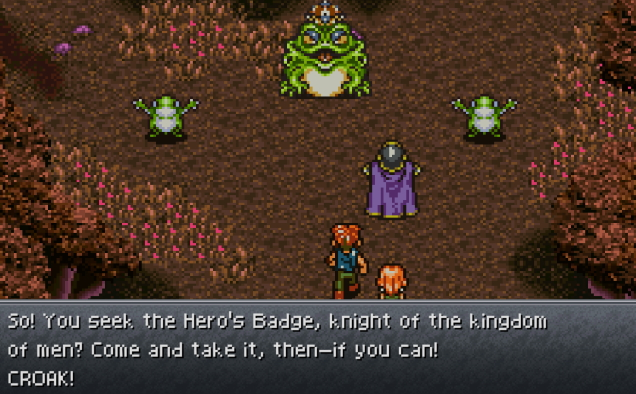

In [ ]:
from PIL import Image
from IPython.display import display

ocr_image_path = 'C:/Users/marti/Desktop/presentations/multimodal/assets/ocr_example.jpg'

img = Image.open(ocr_image_path)   # change to your image file
display(img)

In [ ]:
client = genai.Client(api_key=google_api_key)

ocr_file = client.files.upload(file=ocr_image_path)

response = client.models.generate_content(
    model="gemini-2.0-flash", contents=[ocr_file, "Write down the text in this image."],
)
print(response.text)

So! You seek the Hero's Badge, knight of the kingdom
of men? Come and take it, then-if you can!
CROAK!



In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash", contents=[ocr_file, "Translate the text in this image to French."],
)
print(response.text)

Bien ! Tu cherches l'insigne du Héros, chevalier du royaume des hommes ? Viens le prendre, alors, si tu peux !
COÂ !



### Open source OCR (light-weight)

In [38]:
img = Image.open(ocr_image_path)

In [39]:
from doctr.io import DocumentFile
# PDF
# pdf_doc = DocumentFile.from_pdf("path/to/your/doc.pdf")
# # Image
single_img_doc = DocumentFile.from_images(ocr_image_path)
# # Webpage (requires `weasyprint` to be installed)
# webpage_doc = DocumentFile.from_url("https://www.yoursite.com")
# # Multiple page images
# multi_img_doc = DocumentFile.from_images(["path/to/page1.jpg", "path/to/page2.jpg"])

In [40]:
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
# Analyze
result = model(single_img_doc)

In [41]:
result

Document(
  (pages): [Page(
    dimensions=(394, 636)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [Word(value='/', confidence=0.42)]
        ),
        Line(
          (words): [
            Word(value='S0!', confidence=0.51),
            Word(value='ToU', confidence=0.54),
            Word(value='seek', confidence=0.51),
            Word(value='the', confidence=0.78),
            Word(value='Hero's', confidence=0.87),
            Word(value='padge,', confidence=0.45),
            Word(value='rgnt', confidence=0.39),
            Word(value='of', confidence=0.97),
            Word(value='the', confidence=0.54),
            Word(value='singdom', confidence=0.5),
          ]
        ),
        Line(
          (words): [
            Word(value='of', confidence=1.0),
            Word(value='mers', confidence=0.27),
            Word(value='come', confidence=0.9),
            Word(value='anid', confidence=0.51),
            Word(value='take', confidence=1.0),
     

In [42]:
from doctr.models import ocr_predictor
model = ocr_predictor('db_resnet50', 'crnn_vgg16_bn', pretrained=True)
out = model(single_img_doc)

In [ ]:
[obj2.words]

[Word(value='CROAK!', confidence=1.0)]

In [63]:
res = []
for obj1 in out.pages[0].blocks:
    for obj2 in obj1.lines:
        for obj3 in obj2.words:
            res.append(obj3.value)
' '.join(res)

"So! You seek the Hero's Badge, knight of the singdom of men? Come and take it, then-if you can! CROAK!"

In [44]:
img_np = np.array(img)

# Ensure uint8
img_uint8 = img_np.astype('uint8')
print(img_uint8.dtype)

uint8


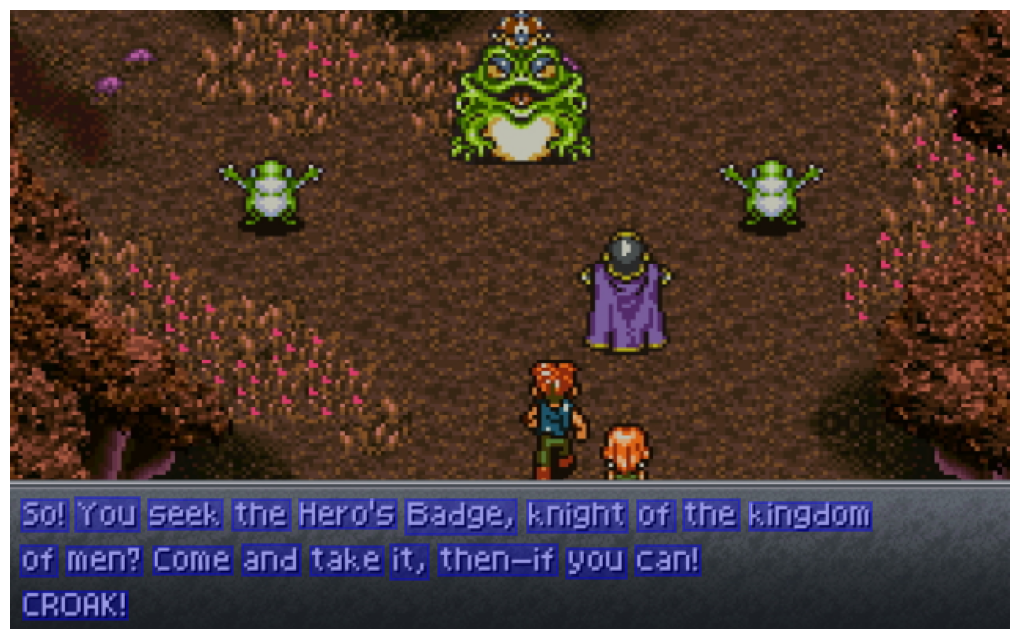

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from doctr.utils.visualization import visualize_page
visualize_page(out.pages[0].export(), img_uint8)
plt.show()

## Bounding boxes with labels

In [ ]:
from utils import plot_bounding_boxes

```json
[
  {"box_2d": [18, 432, 250, 574], "mask": "", "label": "the large crowned frog"},
  {"box_2d": [238, 203, 353, 305], "mask": "", "label": "the small frog on the left"},
  {"box_2d": [238, 709, 353, 811], "mask": "", "label": "the small frog on the right"}
]
```

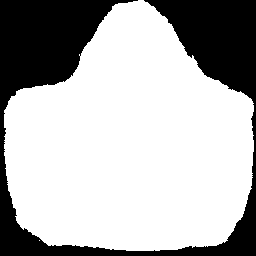
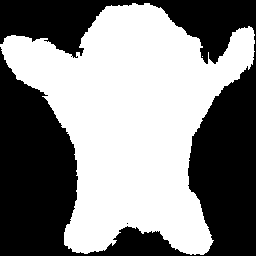
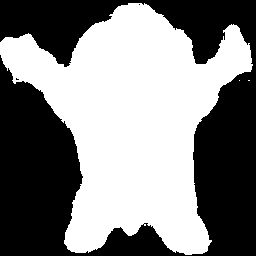

In [ ]:
prompt = "Give the segmentation masks for the frogs in the picture."

# Run model to find segmentation masks
response = client.models.generate_content(
    model='gemini-2.5-flash-preview-05-20',
    contents=[prompt, ocr_file],
    config = types.GenerateContentConfig(
        temperature=0.5,
        safety_settings=safety_settings,
    )
)

# Check output
print(response.text)

(636, 394)


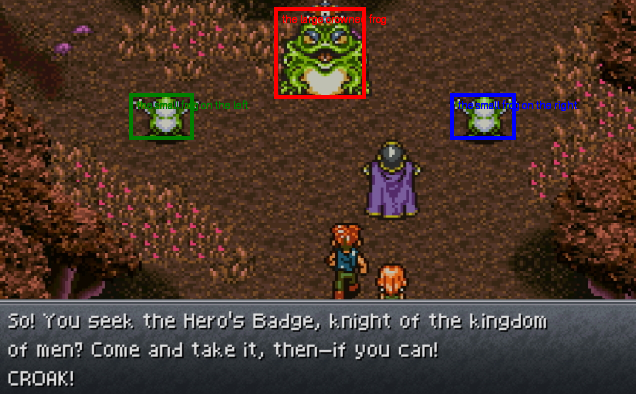

In [12]:
plot_bounding_boxes(img, response.text)